In [ ]:
!conda install pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("postgres_scripts/NIFTY_dataset.xlsx")
df.head()

,id,date,context,news,conversations,label,pct_change
0,nifty_0,2010-01-06,"date,open,high,low,close,adj_close,volume,pct_...",China Officials Likely Knew of Bad Milk\nSony'...,"[{'role': 'user', 'value': ""Project the $SPY i...",Neutral,0.0042
1,nifty_1,2010-01-07,"date,open,high,low,close,adj_close,volume,pct_...",Britain Set for Next Step on Wind Power\nJourn...,"[{'role': 'user', 'value': ""Analyze market dat...",Neutral,0.0033
2,nifty_2,2010-01-11,"date,open,high,low,close,adj_close,volume,pct_...","HK, China stocks rise on reforms; brokerages s...","[{'role': 'user', 'value': 'Forecast the $SPY ...",Fall,-0.0093
3,nifty_3,2010-01-12,"date,open,high,low,close,adj_close,volume,pct_...",DemandTec Names Retail Challenge Grand Final W...,"[{'role': 'user', 'value': 'Forecast the $SPY ...",Rise,0.0084
4,nifty_4,2010-01-13,"date,open,high,low,close,adj_close,volume,pct_...",Gear Malfunction Suspected in United Jet Incid...,"[{'role': 'user', 'value': 'Forecast the $SPY ...",Neutral,0.0027


In [4]:
from helpers.clean_data import IndianNewsDataCleaner


In [7]:
cleaner = IndianNewsDataCleaner(df, country='India', label='label')


In [11]:
df_clean = (
        cleaner
        .map_sentiment()
        .split_rows_in_pairs()
        .add_country()
        .clean_text()
        .filter_data()
        .get_clean_data()
    )
print(df.shape)

Before splitting rows:
  Count: 1477
  Min length: 369
  Max length: 32767
  Mean length: 9559.95

After splitting rows:
  Count: 46795
  Min length: 1
  Max length: 449
  Mean length: 120.71

Before filtering by length:
  Count: 45643
  Min length: 0
  Max length: 445
  Mean length: 119.38

After filtering by length:
  Count: 43442
  Min length: 61
  Max length: 445
  Mean length: 122.78

(1477, 7)


In [13]:
df_clean.head()

,text,label
0,china officials likely knew of bad milk sonys ...,1
2,clothing sales sagged in december luxury logos...,1
3,tcw will quit u.s. program scripps to offer fr...,1
4,britain set for next step on wind power journa...,1
5,european stocks trade in tight ranges shanghai...,1


In [14]:
df['word_count'] = df_clean['text'].apply(lambda x: len(str(x).split()))

# Char counts
df['char_count'] = df_clean['text'].apply(len)

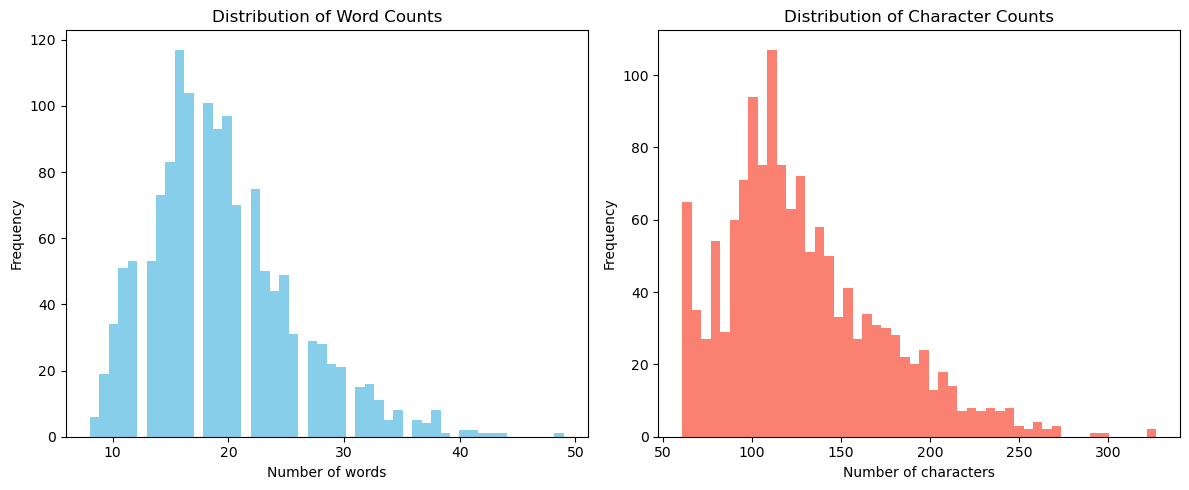

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['word_count'], bins=50, color='skyblue')
plt.title('Distribution of Word Counts')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df['char_count'], bins=50, color='salmon')
plt.title('Distribution of Character Counts')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
print("Word count stats:")
print(df['word_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

print("\nCharacter count stats:")
print(df['char_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

Word count stats:
count    1384.000000
mean       19.414740
std         6.215923
min         8.000000
25%        15.000000
50%        18.000000
75%        23.000000
90%        28.000000
95%        31.000000
max        49.000000
Name: word_count, dtype: float64

Character count stats:
count    1384.000000
mean      129.013728
std        44.240099
min        61.000000
25%        99.000000
50%       119.500000
75%       154.000000
90%       191.000000
95%       214.000000
max       327.000000
Name: char_count, dtype: float64


In [8]:
print(df.columns)

Index(['id', 'date', 'context', 'news', 'conversations', 'label',
       'pct_change'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1477 non-null   object        
 1   date           1477 non-null   datetime64[ns]
 2   context        1477 non-null   object        
 3   news           1477 non-null   object        
 4   conversations  1477 non-null   object        
 5   label          1477 non-null   object        
 6   pct_change     1477 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 80.9+ KB


In [10]:
df['Sentiment'].value_counts()

KeyError: 'Sentiment'

In [ ]:
df.isna().sum()

In [43]:
df.head()

,URL,Content,Summary,Sentiment
0,https://www.moneycontrol.com/news/business/eco...,US consumer spending dropped by a record in Ap...,consumer spending plunges 13.6 percent in Apri...,Negative
1,https://www.businesstoday.in/top-story/state-r...,State-run lenders require an urgent Rs 1.2 tri...,government will have to take a bulk of the tab...,Negative
2,https://www.financialexpress.com/economy/covid...,Apparel exporters on Wednesday urged the gover...,exporters are facing issues in terms of raw ma...,Negative
3,https://www.moneycontrol.com/news/business/mar...,Asian shares battled to extend a global reboun...,the dollar loses some ground on the safe haven...,Negative
4,https://www.financialexpress.com/industry/six-...,After India’s sovereign credit rating fell to ...,six Indian public-sector undertakings have tak...,Negative


In [44]:
df.shape

(26961, 4)

<Axes: xlabel='Sentiment'>

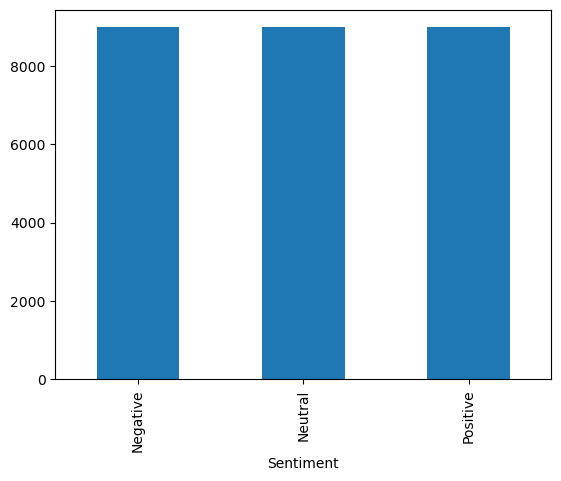

In [46]:
df['Sentiment'].value_counts().plot(kind = 'bar')

In [63]:
df.tail()

URL  \
26956                                                    https://www.financialexpress.com/economy/amit-shah-praises-pm-modi-fm-sitharamam-for-landmark-reform-initiatives/1961259/   
26957  https://economictimes.indiatimes.com/news/politics-and-nation/maharashtra-government-announces-rs-150-crore-compensation-package-for-onion-farmers/articleshow/67181594.cms   
26958                                                    https://www.moneycontrol.com/news/business/commodities/crude-oil-futures-gain-3-99-up-168-67-from-april-lows-5272221.html   
26959                              https://economictimes.indiatimes.com/markets/stocks/news/fed-on-track-to-hike-rates-regardless-of-emerging-market-woes/articleshow/64496872.cms   
26960                     https://www.financialexpress.com/industry/global-startup-ecosystem-report-2020-bangalore-delhi-mumbai-rated-among-worlds-top-startup-ecosystems/2004317/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [52]:
# Character count
df['char_length'] = df['Content'].str.len()
df['token_length'] = df['Content'].str.split().apply(len)

In [60]:
pd.set_option('display.max_colwidth', None)
df['Content'] = df['Content'].str.strip()

# Replace multiple whitespace (spaces, tabs, newlines) with a single space
df['Content'] = df['Content'].str.replace(r'\s+', ' ', regex=True)

In [62]:
for i in range(5):
    print(df.loc[i, 'URL'])
    print('---')

https://www.moneycontrol.com/news/business/economy/covid-19-pandemic-us-consumer-spending-tumble-in-april-5334861.html
---
https://www.businesstoday.in/top-story/state-run-banks-need-urgent-capital-of-rs-1-trillion-due-to-weak-market-valuations-crisil/story/288921.html
---
https://www.financialexpress.com/economy/covid-19-apparel-exporters-body-pitches-for-amnesty-scheme-for-non-fulfilment-of-export-obligations/1902593/
---
https://www.moneycontrol.com/news/business/markets/asias-mood-tested-by-trumps-tariff-threats-3221631.html
---
https://www.financialexpress.com/industry/six-psus-now-fallen-angels-after-indias-sovereign-rating-downgrade-covid-19-took-toll-says-moodys/1985892/
---


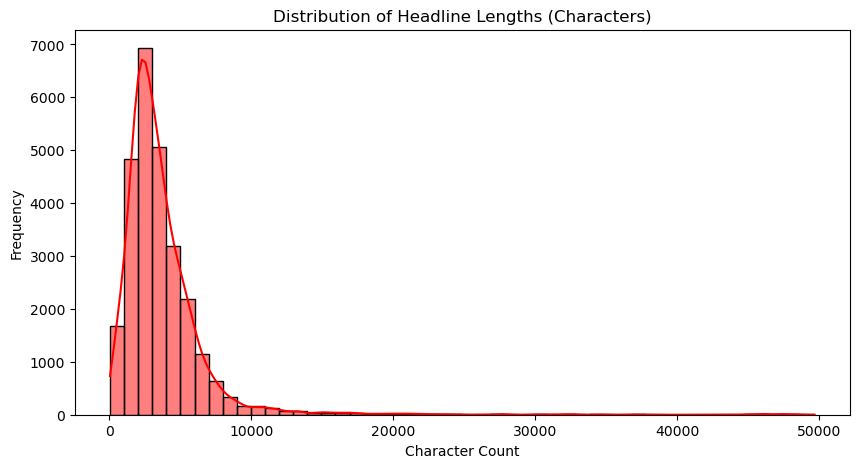

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='char_length', bins=50, kde=True, color='r')
plt.title('Distribution of Headline Lengths (Characters)')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

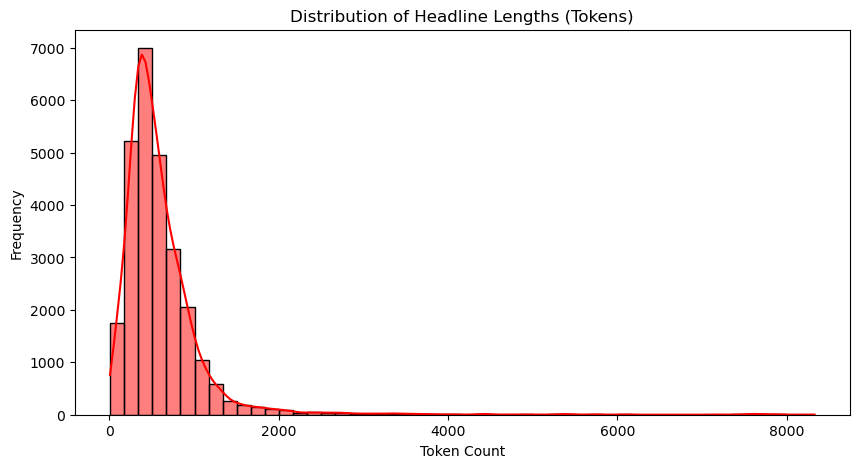

In [54]:
# Token length histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['token_length'], bins=50, kde=True, color='r')
plt.title('Distribution of Headline Lengths (Tokens)')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

In [18]:
df[df['char_length'] >= 30].shape

(164712, 7)

In [19]:
df['country'] = 'India'

In [64]:
df.head()

,URL,Content,Summary,Sentiment,char_length,token_length
0,https://www.moneycontrol.com/news/business/economy/covid-19-pandemic-us-consumer-spending-tumble-in-april-5334861.html,"US consumer spending dropped by a record in April as the COVID-19 pandemic undercut demand, buttressing expectations that the economy could contract in the second quarter at its steepest pace since the Great Depression. The Commerce Department said on Friday consumer spending, which accounts for more than two-thirds of U.S. economic activity, plunged 13.6 percent last month. That was the biggest drop since the government started tracking series in 1959, and followed a 6.9 percent tumble in March. Economists polled by Reuters had forecast consumer spending plummeting 12.6 percent in April. Follow our full coverage of the coronavirus pandemic here.",consumer spending plunges 13.6 percent in April. that was the biggest drop since the government started tracking series in 1959. consumer spending accounts for more than two-thirds of economic activity. economists polled by Reuters had forecast consumer spending plummeting 12.6 percent. a spokesman for the u.s. government said the data was not available.,Negative,657,100
1,https://www.businesstoday.in/top-story/state-run-banks-need-urgent-capital-of-rs-1-trillion-due-to-weak-market-valuations-crisil/story/288921.html,"State-run lenders require an urgent Rs 1.2 trillion in the capital in the next five months and government will have to take a bulk of the tab due to the weak market valuations of these NPA-saddled banks, says report. This is a little more than double the budgeted Rs 53,000-crore of capital infusion for the current fiscal year, Crisil senior director Krishnan Sitaraman said in a report Tuesday. If the government decides to meet this need, this will put further pressure on the fiscal maths, thus its ability to meet the 3.3 per cent fiscal deficit target for the current fiscal year. Already the government has used up over 95 per cent of the deficit target or the market borrowings as of October end. The report comes even as the government is asking the Reserve Bank to lower the minimum capital requirements by getting it at par with global practices-something the central bank is uncomfortable to meet. It has also reported having turned down the finance ministry demand to transfer Rs 3.6 trillion of it's over Rs 9.5 trillion reserves, which government wants to use to recapitalise the bleeding banks. Till now, only Rs 1.12 trillion have been infused into these lenders since October 2017, it said, adding just Rs 12,000 crore has come from the markets, it said. Most of the required capital has to be infused into the 11 lenders who are under the prompt corrective action (PCA) framework of the RBI, wherein depletion in the capital and return on assets, combined with a surge in non-performing assets, has resulted in the severe restrictions on normal operations, it said. ""Given their weak performance and low valuations, state-run banks have little ability to tap the market, which means the government will have to provide most of the requirement,"" it said. Sitaraman said the Rs 1.5 trillion infused by the government in the last three financial years has only helped them cover the losses of Rs 1.3 trillion incurred during the same period. Profitability of state-run banks has been under pressure because of higher credit costs after the RBI tightened norms for recognition of stressed assets and their resolution, the report explained. Most of the 21 state-owned banks have reported huge losses in recent years, and a good number of them will be in the red this fiscal as well which will put a strain on the capital, notes the report. As per the norms, the banks ought to have their tier-I capital at 9.5 per cent, including the capital of conservation buffer (CCB) of 2.5 per cent, it said, adding if the CCB were to be excluded, the capital requirement will fall to Rs 40,000 crore from Rs 1.2 trillion. Meeting the CCB

In [21]:
df[df['Title'].str.len() >= 30].shape

(164712, 8)

In [22]:
df.shape

(164712, 8)

C:\Users\sande\AppData\Local\Temp\ipykernel_11840\2984367917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='flare' )


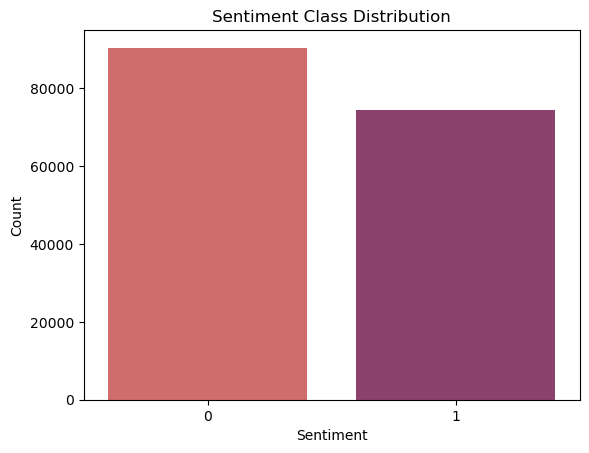

sentiment
0    54.847856
1    45.152144
Name: proportion, dtype: float64


In [23]:
sns.countplot(data=df, x='sentiment', palette='flare' )
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print(df['sentiment'].value_counts(normalize=True) * 100)

In [30]:
df.head()

,Date,Title,URL,sentiment,confidence,char_length,token_length,country
0,2017-05-01,Eliminating shadow economy to have positive im...,http://economictimes.indiatimes.com/news/econo...,1,0.996185,72,12,India
1,2017-05-01,Two Chinese companies hit roadblock with India...,http://economictimes.indiatimes.com/news/econo...,0,-0.955493,59,8,India
3,2017-05-01,Nissan halts joint development of luxury cars ...,http://economictimes.indiatimes.com/news/inter...,0,-0.996672,68,11,India
4,2017-05-01,Despite challenges Rajasthan continues to prog...,http://economictimes.indiatimes.com/news/polit...,1,0.997388,68,9,India
5,2017-05-01,India questions composition of UN panel to dra...,http://economictimes.indiatimes.com/news/polit...,0,-0.968071,59,10,India


In [2]:
from helpers.clean_data import IndianNewsDataCleaner

ModuleNotFoundError: No module named 'pandas'

In [1]:
cleaner = IndianNewsDataCleaner(df, country=country, label=label)

NameError: name 'IndianNewsDataCleaner' is not defined